In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data (1).xlsx


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (102058, 26)


In [ ]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
         id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                           Unknown  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                Unknown     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            102058 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          102058 non-null  object        
 4   host name                       102058 non-null  object        
 5   neighbourhood group             102058 non-null  object        
 6   neighbourhood                   102058 non-null  object        
 7   lat                             102058 non-null  float64       
 8   long                            102058 non-null  float64       
 9   country                         102058 non-null  object        
 10  country code                    102058 non-null  object      

In [ ]:
df.isnull().sum()

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")


In [ ]:
# Fill missing numerical values with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
print(df.isnull().sum().sum(), "missing values remaining.")

15832 missing values remaining.


In [ ]:
# 4.1 Top 10 locations
location_col = None
for col in ['neighbourhood_group', 'neighbourhood', 'city', 'location']:
    if col in df.columns:
        location_col = col
        break

/tmp/ipython-input-345650494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette="coolwarm")


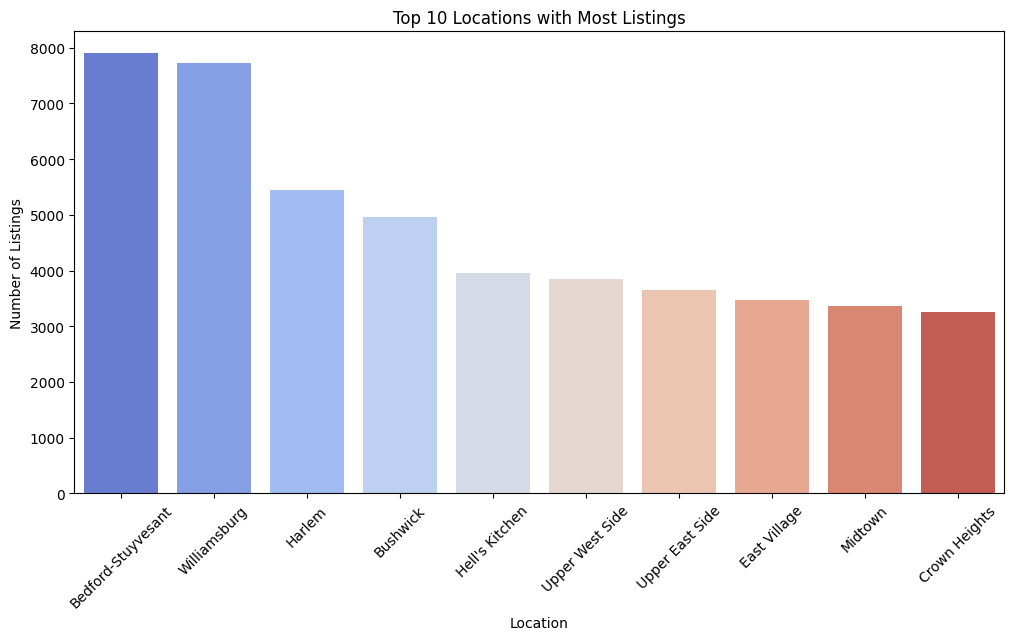

In [ ]:
if location_col:
    plt.figure(figsize=(12,6))
    top_locations = df[location_col].value_counts().head(10)
    sns.barplot(x=top_locations.index, y=top_locations.values, palette="coolwarm")
    plt.title("Top 10 Locations with Most Listings")
    plt.xlabel("Location")
    plt.ylabel("Number of Listings")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(" No location column found for analysis.")

/tmp/ipython-input-2681383304.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette="mako")


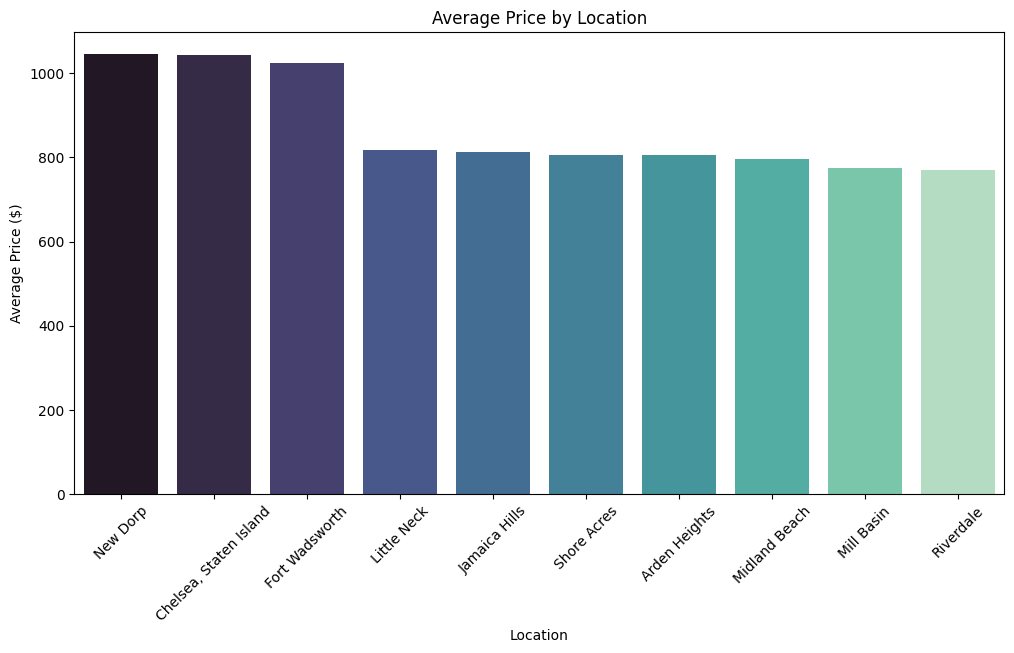

In [ ]:
if 'price' in df.columns and location_col:
    avg_price = df.groupby(location_col)['price'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,6))
    sns.barplot(x=avg_price.index, y=avg_price.values, palette="mako")
    plt.title("Average Price by Location")
    plt.xlabel("Location")
    plt.ylabel("Average Price ($)")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
if 'room_type' in df.columns:
    plt.figure(figsize=(6,6))
    df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title("Room Type Distribution")
    plt.ylabel("")
    plt.show()

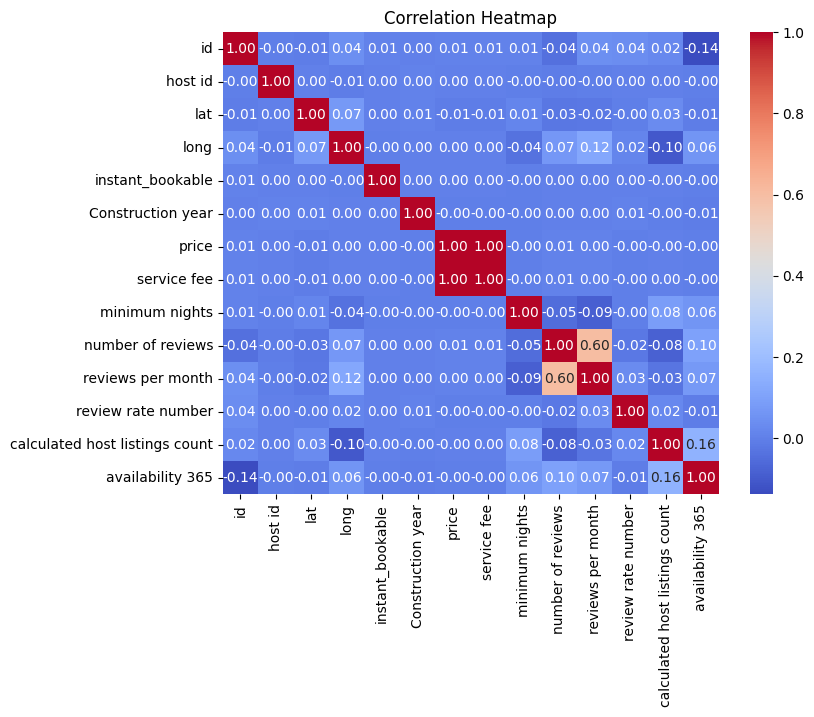

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

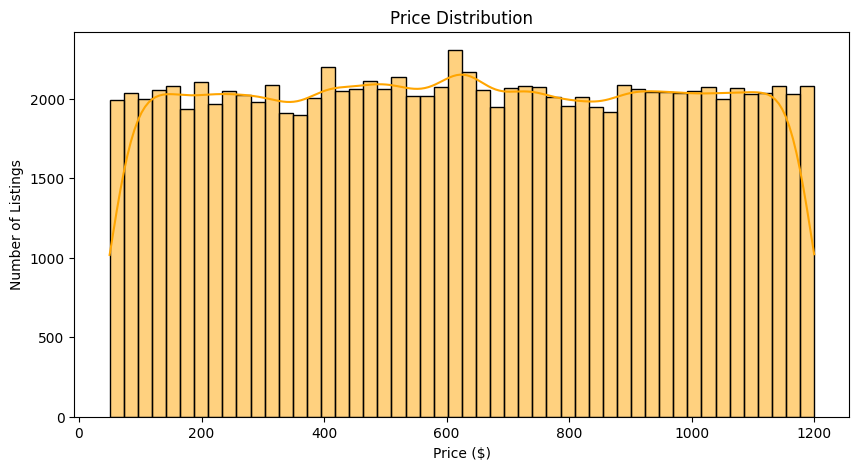

In [ ]:
if 'price' in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df['price'], bins=50, kde=True, color="orange")
    plt.title("Price Distribution")
    plt.xlabel("Price ($)")
    plt.ylabel("Number of Listings")
    plt.show()

In [2]:
print(" Key Insights:")
print("""
1. Most bookings are concentrated in certain neighbourhoods/cities.
2. Entire homes/apartments are the most popular room type.
3. Average prices vary significantly by location and room type.
4. A few locations dominate in terms of number of listings.
5. Price distributions are skewed, with a few high-priced listings.
""")

 Key Insights:

1. Most bookings are concentrated in certain neighbourhoods/cities.
2. Entire homes/apartments are the most popular room type.
3. Average prices vary significantly by location and room type.
4. A few locations dominate in terms of number of listings.
5. Price distributions are skewed, with a few high-priced listings.

